# Introduction

In this Jupyter Notebook finds treating, cleaning and analysis of the dataset, also included PCA with its respectively plots.

# Import Libraries

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA

In [2]:
# Utilities and functions
import DataTransformations

# Data Treating and Cleaning

In this section, the dataset is loaded and some transformations are performed to work only with numerical values.

In [3]:
# Reading Dataset
ObesityDataset_Raw = pd.read_csv('./ObesityDataset_Raw.csv')

In [4]:
# Getting numerical and categorical labels
NumericalLabels , CategoricalLabels = DataTransformations.NumericalCategoricalLabels(ObesityDataset_Raw)

In [5]:
# Converting categorical values into numerical values
CategoricalLabel_NumericalValues = [
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['Female', 'Male'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','yes'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','yes'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','Sometimes', 'Frequently', 'Always'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','yes'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','yes'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','Sometimes', 'Frequently', 'Always'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['Walking', 'Bike', 'Public_Transportation', 'Motorbike', 'Automobile'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])}
]

for CategoricalLabel , NumericalValues in zip(CategoricalLabels,CategoricalLabel_NumericalValues):
    DataTransformations.CategoricalIntoNumerical(ObesityDataset_Raw,CategoricalLabel,NumericalValues)

# Data Visualization

In [6]:
print(f'Numerical labels: {NumericalLabels}',f'Categorical labels: {CategoricalLabels}',sep='\n')

Numerical labels: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical labels: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


<Axes: xlabel='NObeyesdad', ylabel='Weight'>

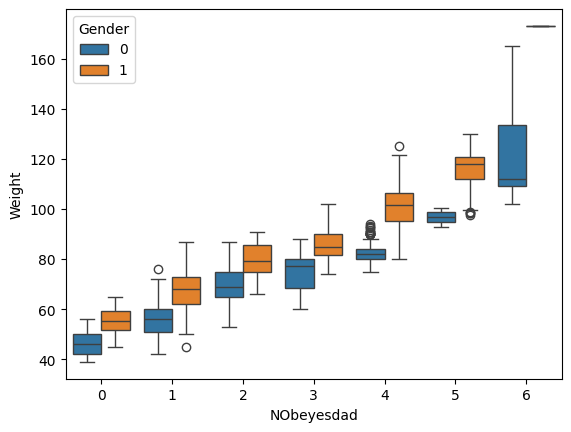

In [7]:
# Detection of outliers based on weight and gender
sns.boxplot(ObesityDataset_Raw,x='NObeyesdad',y='Weight',hue='Gender')

Based on this plot, shows that the dataset has some outliers and possible overlaps between data points with different target labels. This means that the model will suffer of some inaccuracy.

# Principal Component Analysis

In [8]:
FeaturesLabels = NumericalLabels + CategoricalLabels[:-1]
PCAModel_ObesityDataset = PCA(n_components=len(FeaturesLabels))
ObesityDataset_Eigenvalues = PCAModel_ObesityDataset.fit_transform(ObesityDataset_Raw[FeaturesLabels])

In [9]:
def MultiPlotsPCA(Dataset_Eigenvalues:pd.DataFrame,NumberLabels_Plot:int,TargetLabels):
    CombinationsLabels_Plot = list(combinations(range(NumberLabels_Plot),2))
    NumSubplots = len(CombinationsLabels_Plot)
    if NumSubplots < 3:
        nrows , ncols = 1 , NumSubplots
        fig , axs = plt.subplots(nrows,ncols,figsize=(5,4))
        axs = [axs] 
    else:
        ncols = 3
        nrows , residual = divmod(NumSubplots,3)
        nrows += 1 if residual>0 else 0
        fig , axs = plt.subplots(nrows,ncols,figsize=(15,4*nrows))
        axs = axs.flat
    for ax , PCLabels in zip(axs,CombinationsLabels_Plot):
        PCLabel_1 , PCLabel_2 = PCLabels
        ax.scatter(Dataset_Eigenvalues[:,PCLabel_1],Dataset_Eigenvalues[:,PCLabel_2],c=TargetLabels,cmap='Set2')
        ax.set_xlabel(f'PC{PCLabel_1}')
        ax.set_ylabel(f'PC{PCLabel_2}')

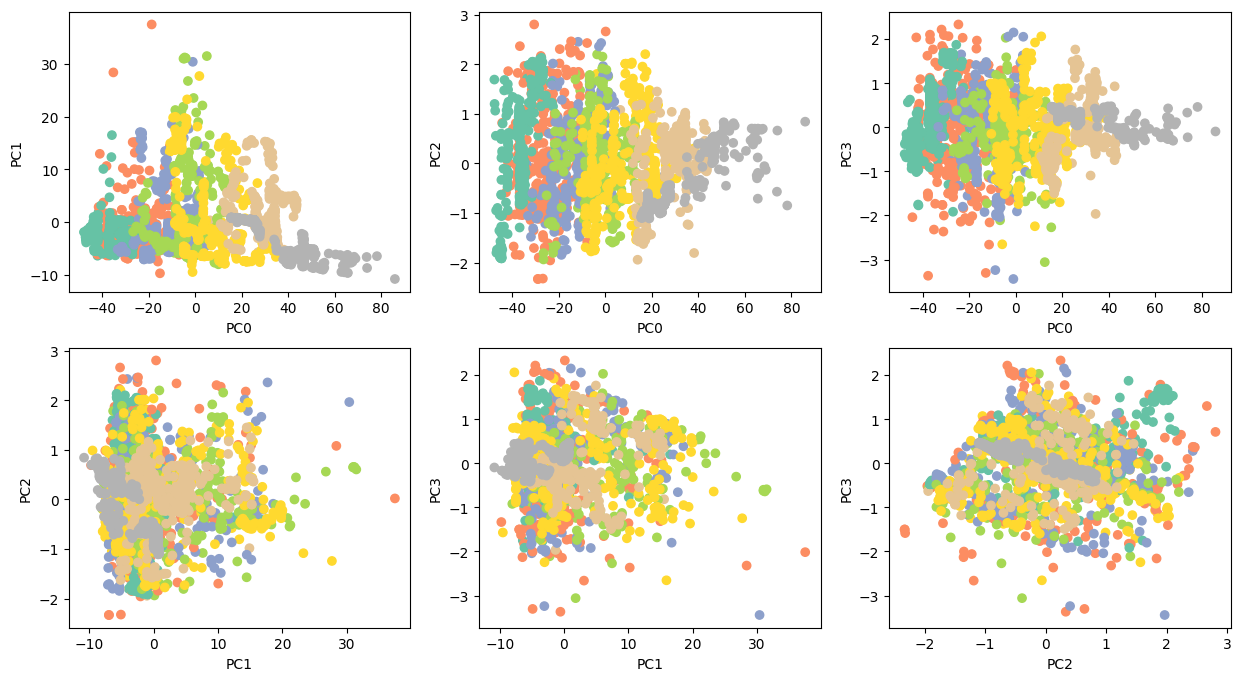

In [10]:
MultiPlotsPCA(ObesityDataset_Eigenvalues,4,ObesityDataset_Raw['NObeyesdad'])